In [198]:
import pandas as pd
import numpy as np

In [199]:
##### Q1 ####
def load_data():                                                                     ##1
    data=pd.read_csv("data/olympics.csv")
    data.columns = data.iloc[0]
    data=data.drop(data.index[0])
    data.rename(columns = {"01 !":'Gold'}, inplace = True)
    data.rename(columns = {"02 !":'Silver'}, inplace = True)
    data.rename(columns = {"03 !":'Bronze'}, inplace = True)
    data = data.rename(columns={np.nan: '0'})
    spli=data['0']
    spli1=spli.apply(lambda x: x.split('\xc2\xa0')[-1])
    data['0']=data['0'].apply(lambda x: x.split('\xc2\xa0')[0])
    spli1=spli1.apply(lambda x: x.split(' ')[0])
   # data['country_code']=spli1        
    data.set_index('0',inplace=True)
    data.index.name=None
    data.drop(['Total'],axis=1,inplace=True)
    return data

df=load_data()
df.head()

,# Summer,Gold,Silver,Bronze,# Winter,Gold,Silver,Bronze,# Games,Gold,Silver,Bronze,Combined total
Afghanistan,13,0,0,2,0,0,0,0,13,0,0,2,2
Algeria,12,5,2,8,3,0,0,0,15,5,2,8,15
Argentina,23,18,24,28,18,0,0,0,41,18,24,28,70
Armenia,5,1,2,9,6,0,0,0,11,1,2,9,12
Australasia,2,3,4,5,0,0,0,0,2,3,4,5,12


In [200]:
##### Q2 ####
def first_country(df):
    k=df.iloc[0]
    k=pd.Series(k)
    return k


#call
print first_country(df)

0
# Summer          13
Gold               0
Silver             0
Bronze             2
# Winter           0
Gold               0
Silver             0
Bronze             0
# Games           13
Gold               0
Silver             0
Bronze             2
Combined total     2
Name: Afghanistan, dtype: object


In [201]:

##### Q3 ####
def gold_medal(df):
    l=df['Gold']
    k=l.iloc[:,0].argmax()
    return k                                                      ###3

#call
print gold_medal(df)

United States


In [202]:

##### Q4 ####

def biggest_difference_in_gold_medal(df):
    k=df['Gold']
    l=k.iloc[:-1,0]
    m=k.iloc[:-1,1]
    l=pd.DataFrame(l)
    m=pd.DataFrame(m)
    l=l['Gold'].astype('int64')
    m=m['Gold'].astype('int64')
    s=(abs(l-m)).argmax()
    return s

print biggest_difference_in_gold_medal(df)
                                            ###4

United States


In [203]:
##### Q5  ####

def get_points(df):
    g=df['Gold'].iloc[:,0].astype("int64")
    s=df['Silver'].iloc[:,0].astype("int64")
    b=df['Bronze'].iloc[:,0].astype("int64")
    g=g*3
    s=s*2
    f=g+s+b
    df['Points']=f
    return f           ##5

print get_points(df)

Afghanistan                             2
Algeria                                27
Argentina                             130
Armenia                                16
Australasia                            22
Australia                             898
Austria                               155
Azerbaijan                             43
Bahamas                                24
Bahrain                                 1
Barbados                                1
Belarus                               123
Belgium                               268
Bermuda                                 1
Bohemia                                 5
Botswana                                2
Brazil                                184
British West Indies                     2
Bulgaria                              401
Burundi                                 3
Cameroon                               12
Canada                                496
Chile                                  24
China                             

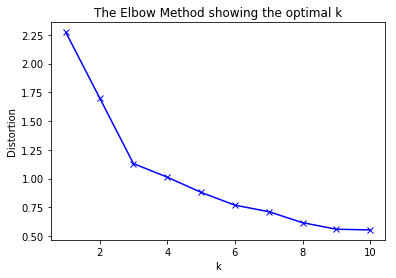

(3, array([[  1.25536383,   0.06413859,   0.06732204,   0.06491531,
          1.44504954,   0.0809691 ,   0.08668509,   0.08885822,
          1.47994534,   0.06711906,   0.07073496,   0.06880049,
          0.06890688,   0.06535155],
       [  1.91874373,  11.73662663,  11.83575973,  11.88589515,
          2.06528189,  11.74747232,  11.75920458,  11.78939553,
          2.18160709,  11.77075826,  11.84966261,  11.89234396,
         11.8436403 ,  11.80168646],
       [ -0.44373583,  -0.12944729,  -0.13143739,  -0.13108038,
         -0.50946895,  -0.1352599 ,  -0.13730782,  -0.13832247,
         -0.52238151,  -0.13077214,  -0.13272345,  -0.13245837,
         -0.13204766,  -0.13045591]]))


In [211]:
##### Q6 Kmeans ####
from sklearn.cluster import KMeans
from scipy import stats
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

def k_means(df):
    k=df.columns
    for i in k:
        df[i]=df[i].astype("int64")
    clmns = df.columns
    df_std = stats.zscore(df[clmns])

    distortions = []
    K = range(1,11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(df_std)
        kmeanModel.fit(df_std)
        distortions.append(sum(np.min(cdist(df_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_std.shape[0])
            
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    ## this means k=3 is best case of this dataset
    k=3 #final
    
    #standarizing our data
    scaler = StandardScaler()
    df_fin = scaler.fit(df).transform(df)

    
    kmeanModel = KMeans(n_clusters=k).fit(df_fin)
    kmeanModel.fit(df_fin)
    centroids = kmeanModel.cluster_centers_
    return k,centroids
    

print k_means(df)
